<a href="https://colab.research.google.com/github/crealkiller/Major-Project-3/blob/main/Major_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Clustering Algorithms Implementation:

#a. K-Means Clustering:

#Introduction:
K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets.
The K-means algorithm aims to minimize the total intra-cluster variance, making the points within a cluster as similar to each other as possible.

Iris dataset is used here for K-Means clustering.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


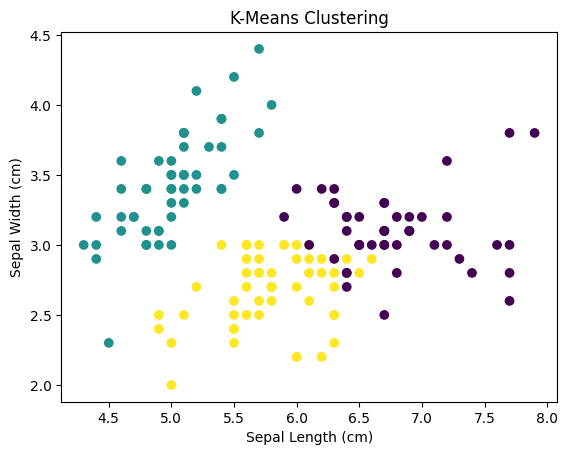

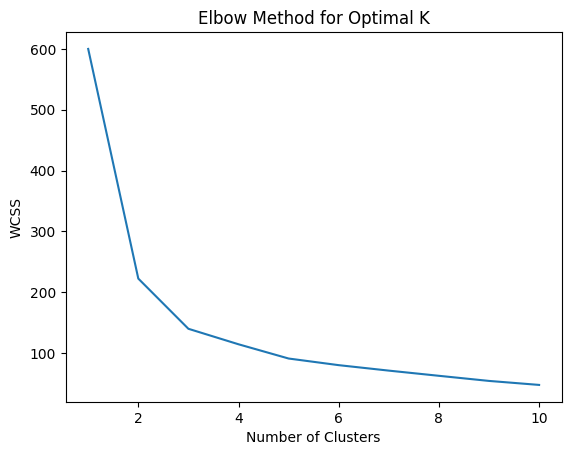

In [20]:
#Importing necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#Loading the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

#Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# To visualize clusters
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

#Determine the optimal number of clusters using Elbow Method technique
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#b. Hierarchical Clustering:

#Introduction:
Hierarchical clustering is another unsupervised machine learning technique that groups similar data points
into clusters based on a hierarchy or tree-like structure. Unlike K-means clustering, hierarchical clustering
does not require specifying the number of clusters beforehand, and it organizes the data in a way that reflects
the relationships between clusters.


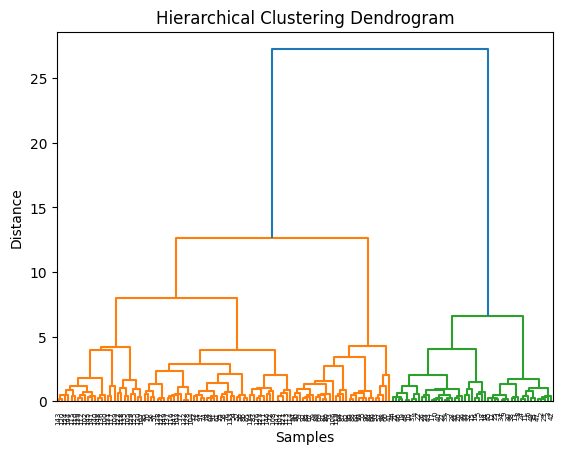

In [21]:
#Importing libraries
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Applying Hierarchical Clustering
linked = linkage(df_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


#Advantages and Disadvantages:

#Advantages
1) No Need to Prespecify the Number of Clusters

2) Hierarchical Representation

3) Flexibility in Linkage Methods

4) Captures Complex Structures


#Disadvantages
1) Sensitivity to Outliers

2) Difficulty in Handling Large Datasets

3) Lack of Unique Solutions

#c. DBSCAN:
#Introduction:
DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular unsupervised
machine learning algorithm used for clustering spatial data. Unlike some other clustering algorithms (e.g., K-means),
DBSCAN does not require specifying the number of clusters beforehand and can discover clusters of arbitrary shapes.
It is particularly effective at identifying clusters in datasets with varying densities.

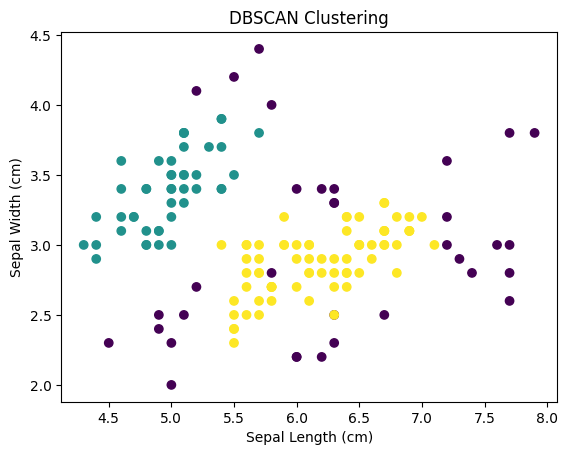

In [22]:
#Importing libraries
from sklearn.cluster import DBSCAN

#Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(df_scaled)

#To Visualize DBSCAN clusters
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster_dbscan'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


#Performance Comparison with k-means clustering:
#Strengths
1) DBSCAN can identify clusters with irregular shapes and is not restricted to spherical clusters. It is effective in capturing clusters of varying shapes and densities.

2) DBSCAN is robust to noise and can effectively identify and label outliers as noise points, making it suitable for datasets with noisy or sparse regions.

3) DBSCAN works well when clusters have uneven sizes and densities.

#Weakness
1) The performance of DBSCAN can be sensitive to the choice of parameters, particularly the distance parameter (ϵ) and the minimum number of points (MinPts).

2) DBSCAN may struggle with datasets where clusters have significantly varying densities.

#Dimensionality Reduction Techniques:
#a. Principal Component Analysis (PCA):
#PCA is used to reduce the dimensionality of a high-dimensional dataset.

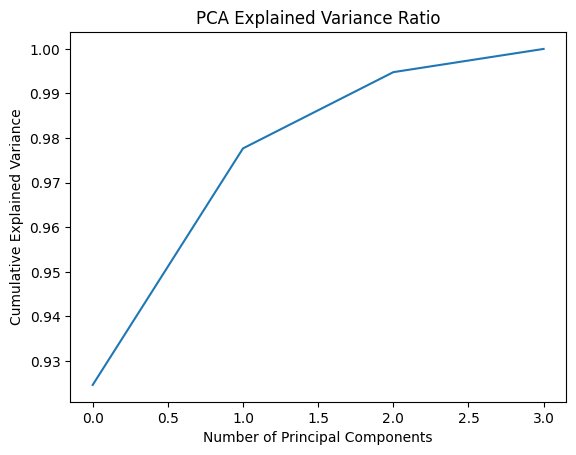

In [23]:
#Importing libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Applying PCA
data = np.array(data.data)
pca = PCA()
data_pca = pca.fit_transform(data)

#To visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.show()


#1. Data Visualization:
Reduced Complexity:

High-dimensional datasets are challenging to visualize directly. Dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE), project data onto a lower-dimensional space, making it more accessible for visualization.

#Preservation of Patterns:
Dimensionality reduction aims to preserve the essential patterns and structures in the data while discarding less relevant information. Visualization in a lower-dimensional space can reveal inherent relationships and clusters within the data.

#Enhanced Interpretability:
Reduced-dimensional representations often lead to more interpretable visualizations. Features are transformed into a smaller set of components that may correspond to meaningful aspects of the data, aiding in insights and decision-making.

#2. Data Modeling:
#Computational Efficiency:
High-dimensional datasets can pose computational challenges for many machine learning algorithms. Dimensionality reduction can improve the efficiency of modeling algorithms, speeding up training and inference processes.

#Mitigation of Curse of Dimensionality:
The curse of dimensionality refers to the challenges associated with high-dimensional spaces, such as increased sparsity and computational requirements. Dimensionality reduction mitigates these issues by reducing the number of features, improving the generalization performance of models.

#Improved Generalization:
Dimensionality reduction helps in reducing overfitting, especially when dealing with datasets where the number of features is comparable to or exceeds the number of samples. It focuses on the most informative features, leading to better generalization to unseen data.

# Variance Ratio Plot (PCA):

When using Principal Component Analysis (PCA) for dimensionality reduction, one crucial aspect is understanding the explained variance ratio plot. Here's how to interpret it:

#Explained Variance Ratio:

The explained variance ratio represents the proportion of the dataset's total variance that is captured by each principal component. The ratio for each principal component is calculated by dividing its eigenvalue (variance) by the total eigenvalues.

#Plotting Explained Variance:

The plot typically shows the cumulative explained variance ratio against the number of principal components. Each point on the plot indicates the cumulative percentage of variance explained by considering up to that specific number of principal components.

#Interpretation:

The plot helps in deciding the optimal number of principal components to retain based on the desired level of explained variance. A steep increase in the cumulative explained variance indicates that adding more components does not significantly contribute to capturing additional variance.

#Elbow Point:

Look for an "elbow" point on the plot, where the increase in explained variance starts to slow down. The number of principal components at this point is often chosen as it represents a balance between dimensionality reduction and information retention.

#Setting a Threshold:

Alternatively, a specific threshold (e.g., 95% or 99% variance retained) can be set, and the number of principal components required to achieve that threshold is selected.

#Impact on Dimensionality Reduction:

The plot provides insights into how much dimensionality can be reduced while retaining a certain percentage of the original data's variance. Choosing fewer components can lead to faster computations and potentially simpler models.

# b. t-SNE (t-Distributed Stochastic Neighbor Embedding):

t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique commonly used
for visualizing high-dimensional data in lower-dimensional spaces, typically two or three dimensions. Unlike
traditional techniques such as PCA (Principal Component Analysis), t-SNE focuses on preserving pairwise similarities
between data points in the high-dimensional space, making it particularly effective for revealing intricate structures
and relationships in the data.

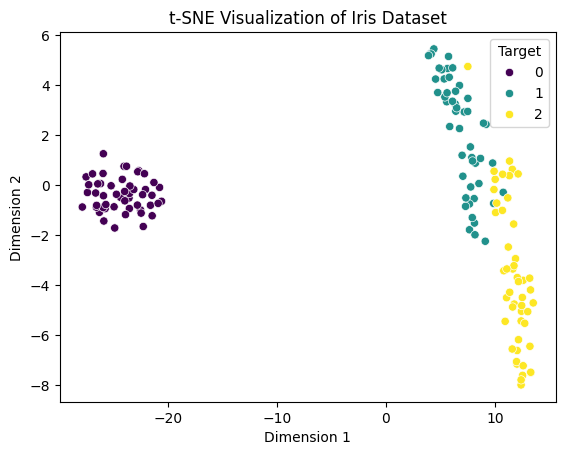

In [24]:
#Importing libraries
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Create a DataFrame for visualization
import pandas as pd
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Target'] = target

# Visualize t-SNE results
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Target', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization of Iris Dataset')
plt.show()


# Advanced Clustering Techniques:

1. Mean Shift Clustering:
Overview:
Mean Shift is a density-based clustering algorithm that aims to find modes or peaks in the data distribution.
Advantages:
Does not require specifying the number of clusters in advance.
Well-suited for datasets with irregular shapes and varying densities.
Applications:
Image segmentation, object tracking, and feature space analysis.
2. OPTICS (Ordering Points to Identify the Clustering Structure):
Overview:
OPTICS is a density-based clustering algorithm that extends DBSCAN. It creates a reachability plot to identify clusters with varying densities.
Advantages:
Robust to noise and able to discover clusters of varying shapes and sizes.
Provides a hierarchical clustering structure.
Applications:
Spatial data analysis, anomaly detection, and density-based clustering.
3. Spectral Clustering:
Overview:
Spectral Clustering uses the eigenvalues of a similarity matrix to perform dimensionality reduction before applying K-means or another clustering algorithm.
Advantages:
Effectively captures clusters with non-convex shapes.
Applicable to both symmetric and asymmetric affinity matrices.
Applications:
Image segmentation, document clustering, and community detection.**bold text**

# Dimensionality Reduction Techniques Comparison:
# Strengths, Weaknesses, and Use Cases:

### Principal Component Analysis (PCA):

**Strengths:**
1. **Linear Dimensionality Reduction:**
   - Effective for linearly correlated features, capturing the most significant variance in the data.
2. **Computational Efficiency:**
   - Computationally efficient, making it suitable for large datasets.
3. **Global Structure Preservation:**
   - Preserves the global structure of the data.

**Weaknesses:**
1. **Assumes Linearity:**
   - Assumes linear relationships between features, which may limit its effectiveness for nonlinear structures.
2. **Orthogonal Transformation:**
   - Components are orthogonal, and interpretability of components may be challenging.
3. **Sensitive to Scaling:**
   - Sensitive to the scale of the input features.

**Use Cases:**
- Image compression, noise reduction, feature extraction for machine learning models.

### t-Distributed Stochastic Neighbor Embedding (t-SNE):

**Strengths:**
1. **Nonlinear Dimensionality Reduction:**
   - Effective for capturing nonlinear relationships in the data.
2. **Preservation of Local Structures:**
   - Preserves local structures, making it suitable for visualizing clusters and patterns.
3. **Useful for Visualization:**
   - Widely used for visualizing high-dimensional data in two or three dimensions.

**Weaknesses:**
1. **Non-Deterministic:**
   - Non-deterministic nature, leading to different results in multiple runs.
2. **Computational Complexity:**
   - Computationally intensive, especially for large datasets.
3. **Perplexity Sensitivity:**
   - Sensitive to the choice of perplexity parameter.

**Use Cases:**
- Visualization of high-dimensional data, exploratory data analysis, pattern recognition.



# Application of unsupervised machine learning

Unsupervised learning is a category of machine learning where the algorithm is given data without explicit instructions on what to do with it. The system tries to learn the patterns and structures within the data on its own. Here are some applications of unsupervised learning:

1. **Clustering:**
   - **Customer Segmentation:** Grouping customers based on purchasing behavior, demographics, or other relevant features for targeted marketing strategies.
   - **Document Clustering:** Organizing large sets of documents into clusters to aid in information retrieval and organization.

2. **Dimensionality Reduction:**
   - **Feature Extraction:** Reducing the number of features in a dataset while retaining essential information, which can improve model efficiency and performance.
   - **Image Compression:** Reducing the size of images while preserving essential visual information.

3. **Anomaly Detection:**
   - **Fraud Detection:** Identifying unusual patterns or behaviors in financial transactions that may indicate fraudulent activities.
   - **Network Intrusion Detection:** Detecting abnormal patterns in network traffic that could indicate a security breach.

4. **Generative Models:**
   - **Data Synthesis:** Generating synthetic data that resembles real data to augment training sets, especially when real data is scarce.
   - **Image and Text Generation:** Creating new images or generating coherent text based on learned patterns in the training data.

5. **Association Rule Learning:**
   - **Market Basket Analysis:** Identifying patterns in customer purchasing behavior to uncover associations between products, helping with product placement and recommendations.
   - **Healthcare Diagnosis:** Discovering associations between symptoms and diseases for improved diagnosis and treatment planning.

6. **Density Estimation:**
   - **Outlier Detection:** Identifying instances in a dataset that deviate significantly from the norm, which can be useful in various domains like finance or healthcare.

7. **Reinforcement Learning (when combined with unsupervised learning):**
   - **State Representation Learning:** Learning useful representations of states in a reinforcement learning environment without explicit labels.

8. **Natural Language Processing (NLP):**
   - **Topic Modeling:** Extracting topics from a collection of text documents to understand the main themes present.
   - **Word Embeddings:** Creating vector representations of words based on their contextual usage in text.

9. **Recommendation Systems:**
   - **Collaborative Filtering:** Suggesting products, movies, or content based on the preferences and behaviors of similar users.

10. **Speech and Audio Analysis:**
    - **Speaker Diarization:** Separating and identifying different speakers in an audio recording.
    - **Audio Source Separation:** Separating different sound sources in an audio signal.

Unsupervised learning techniques play a crucial role in exploring and understanding patterns within data, providing valuable insights in various domains.